In [24]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

Increasing cell width of jupyter notebook

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

fetch_mldata() is deprecated from sklearn 0.20.
So using fetch_openml() instead. However fetch_openml() return dataset in unsorted format, whereas fetch_mldata() returned dataset sorted by target

In [9]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

sklearn.datasets.fetch_openml(name=None, version=’active’, data_id=None, data_home=None, target_column=’default-target’, cache=True, return_X_y=False)

In [16]:
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1,cache=True)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    sort_by_target(mnist)
except:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')
    
mnist["data"], mnist["target"]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))

In [17]:
mnist.data.shape


(70000, 784)

In [18]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [19]:
y.shape

(70000,)

Display a random number

(-0.5, 27.5, 27.5, -0.5)

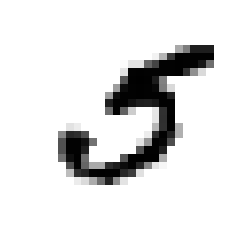

In [34]:
random_number = X[36000]
random_digit = random_number.reshape(28,28)
plt.imshow(random_digit, cmap= mpl.cm.binary)
plt.axis("off")

In [33]:
y[36000]

5

In [35]:
X_train, X_test, y_train, y_test = X[:60000],X[60000:], y[60000:], y[60000:]

X_train.shape

(60000, 784)

Shuffle the dataset to make sure cross validation folds does not miss any digit